In [1]:
import os
os.chdir('/home/dennis/SourceCode/NCTU-Machine-Learning/homework#1-2018Spring/libsvm-master/python')

In [2]:
%matplotlib inline

import svm
import svmutil
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics.pairwise import linear_kernel, rbf_kernel

sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (10.0, 10.0)
os.chdir('/home/dennis/SourceCode/NCTU-Machine-Learning/homework#2')

PCA Implementation

In [3]:
class PCA:
    def __init__(self, data, k):
        """
        PCA module will take two inputs:
        data: original data matrix with n*d numpy.ndarray where n is number of data and
              d is dimension of each data point.
        k: The dimension will be given after performing PCA.
        """
        self.data = self._normalization(data)
        self.cov = self._covariance()
        self.trans = self._trans(self.cov, k)
    def _normalization(self, data):
        """
        This function normalizes the data 
        """
        mean = np.mean(data, axis=0)
        # Unbias estimator
        # Avoid divide by zero problem
#         std = np.std(data, axis=0, ddof=1) + 10e-10
        return (data-mean)
    def _covariance(self):
        """
        This function takes normalized data as input,
        then output its covariance matrix.
        """
        return np.cov(self.data, rowvar=False) / self.data.shape[0]
    def _trans(self, cov, k):
        val, vec = np.linalg.eig(cov)
        # get index of k max eigenvalues
        idx = np.argsort(val)[-1: -(k+1): -1]
        return vec[:, idx]
    def transform(self):
        return self.data @ self.trans

In [4]:
X_train = pd.read_csv('./data/X_train.csv', header=None)
T_train = pd.read_csv('./data/T_train.csv', header=None)

In [8]:
X_train_list = X_train.values.tolist()
T_train_list = T_train[0].tolist()
len(X_train_list[0])

784

rbf svm

In [9]:
svm_prob = svm.svm_problem(T_train_list, X_train_list)
svm_param = svm.svm_parameter('-t 2 -c {} -g {}'.format(10000, 0.01))
model_rbf_best = svmutil.svm_train(svm_prob, svm_param)

In [19]:
idx_SV = np.array(model_rbf_best.get_sv_indices()) - 1

In [15]:
X_train_low = PCA(X_train.values, 2).transform().real
X_train_low.shape

(5000, 2)

In [17]:
df = pd.DataFrame(X_train_low, columns=['x', 'y'])
df['target'] = T_train.values
df.head()

,x,y,target
0,-4.471625,1.270136,1
1,-4.563951,1.532391,1
2,-2.413384,0.399932,1
3,-3.861771,0.350350,1
4,-6.731040,1.609231,1


In [20]:
df['target'][idx_SV] = 'support_vectors'

/home/dennis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


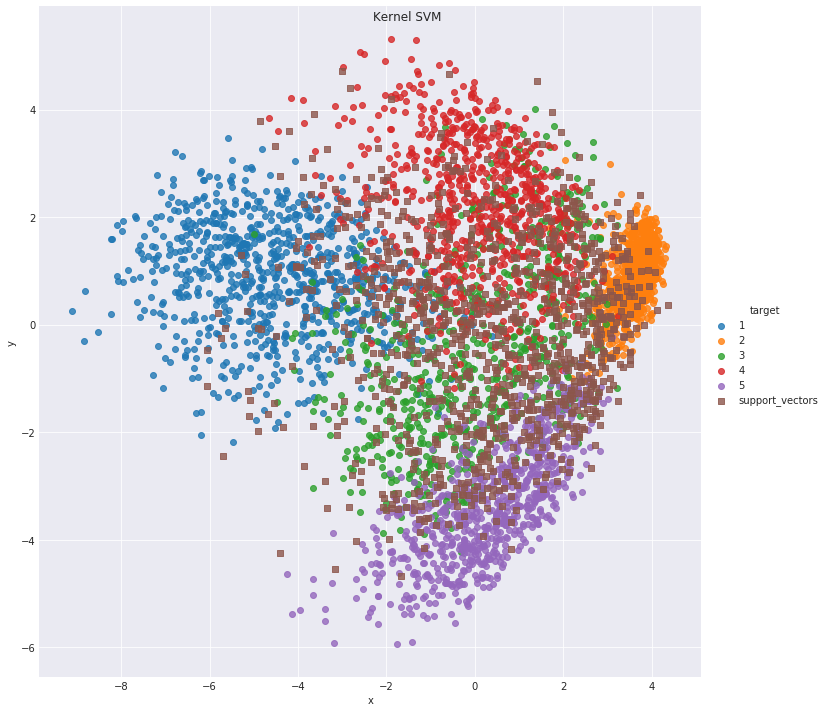

In [33]:
plot = sns.lmplot(x='x', y='y', data=df, fit_reg=False, hue='target',
                  hue_order=[1, 2, 3, 4, 5, 'support_vectors'], legend=True, size=10,
                 markers=['o'] * 5 + ['s'])
fig = plot.fig
fig.suptitle("Kernel SVM", fontsize=12)
fig.savefig('./plot/{}.png'.format('rbf_svm'))

linear kernel

In [34]:
svm_prob = svm.svm_problem(T_train_list, X_train_list)
svm_param = svm.svm_parameter('-t 0 -b 1')
model_linear = svmutil.svm_train(svm_prob, svm_param)

In [38]:
idx_SV = np.array(model_linear.get_sv_indices()) - 1
df = pd.DataFrame(X_train_low, columns=['x', 'y'])
df['target'] = T_train.values
df['target'][idx_SV] = 'support_vectors'

/home/dennis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


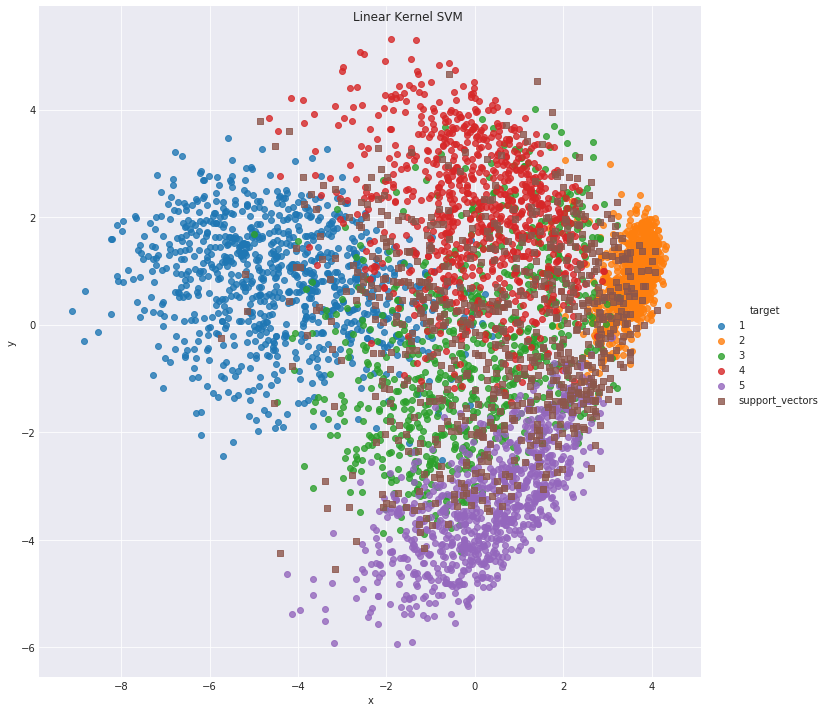

In [39]:
plot = sns.lmplot(x='x', y='y', data=df, fit_reg=False, hue='target',
                  hue_order=[1, 2, 3, 4, 5, 'support_vectors'], legend=True, size=10,
                 markers=['o'] * 5 + ['s'])
fig = plot.fig
fig.suptitle("Linear Kernel SVM", fontsize=12)
fig.savefig('./plot/{}.png'.format('linear_svm'))

Poly Kernel

In [41]:
svm_prob = svm.svm_problem(T_train_list, X_train_list)
svm_param = svm.svm_parameter('-t 1 -b 1')
model_poly = svmutil.svm_train(svm_prob, svm_param)

In [42]:
idx_SV = np.array(model_poly.get_sv_indices()) - 1
df = pd.DataFrame(X_train_low, columns=['x', 'y'])
df['target'] = T_train.values
df['target'][idx_SV] = 'support_vectors'

/home/dennis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


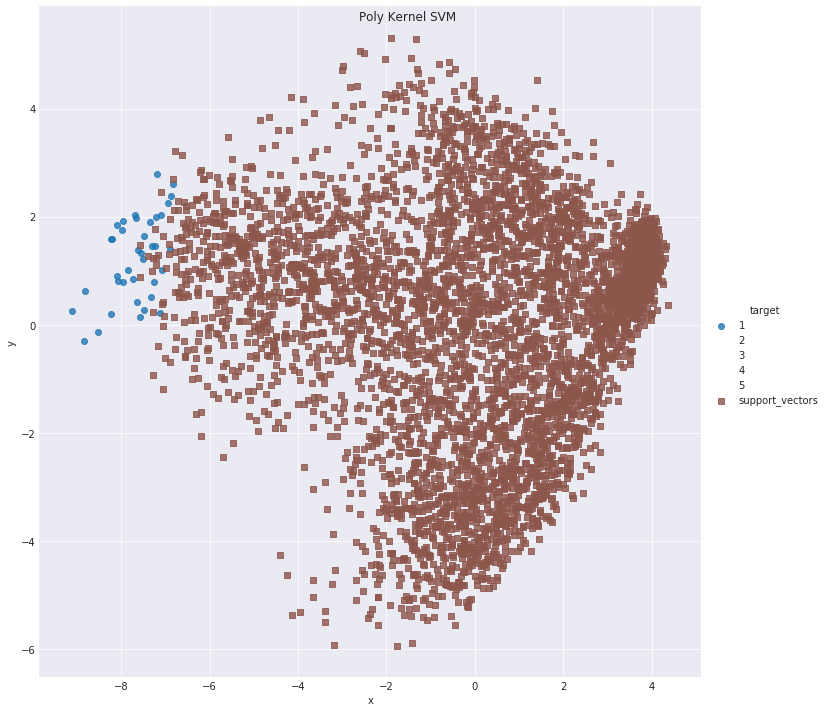

In [43]:
plot = sns.lmplot(x='x', y='y', data=df, fit_reg=False, hue='target',
                  hue_order=[1, 2, 3, 4, 5, 'support_vectors'], legend=True, size=10,
                 markers=['o'] * 5 + ['s'])
fig = plot.fig
fig.suptitle("Poly Kernel SVM", fontsize=12)
fig.savefig('./plot/{}.png'.format('poly_svm'))

Linear + RBF kernel

In [45]:
from sklearn.metrics.pairwise import rbf_kernel, linear_kernel
X_train_mat = X_train.values
print(X_train_mat.shape)

(5000, 784)


In [47]:
custom_kernel = rbf_kernel(X_train_mat, gamma=0.01) + linear_kernel(X_train_mat)
print(custom_kernel.shape)

(5000, 5000)


In [48]:
custom_kernel_list = custom_kernel.tolist()
for i in range(len(custom_kernel_list)):
    custom_kernel_list[i].insert(0, i+1)

In [49]:
svm_param = svm.svm_parameter('-t 4 -c {} -g {} -b 1'.format(10000, 0.01))
svm_prob = svm.svm_problem(T_train_list, custom_kernel_list, isKernel=True)
model_rbf_linear = svmutil.svm_train(svm_prob, svm_param)

In [50]:
idx_SV = np.array(model_rbf_linear.get_sv_indices()) - 1
df = pd.DataFrame(X_train_low, columns=['x', 'y'])
df['target'] = T_train.values
df['target'][idx_SV] = 'support_vectors'

/home/dennis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


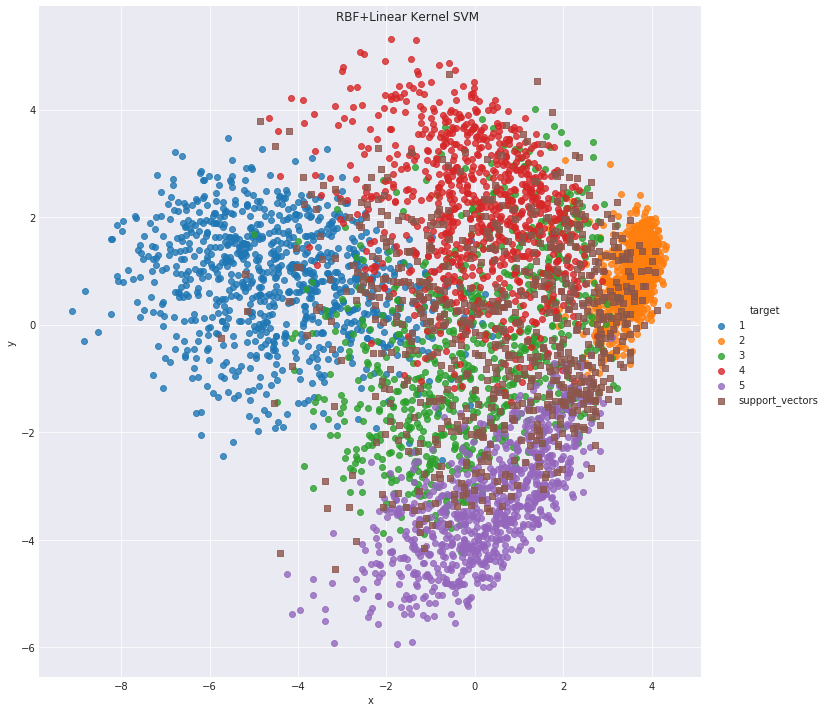

In [51]:
plot = sns.lmplot(x='x', y='y', data=df, fit_reg=False, hue='target',
                  hue_order=[1, 2, 3, 4, 5, 'support_vectors'], legend=True, size=10,
                 markers=['o'] * 5 + ['s'])
fig = plot.fig
fig.suptitle("RBF+Linear Kernel SVM", fontsize=12)
fig.savefig('./plot/{}.png'.format('rbf_linear_svm'))

In [52]:
idx_SV.shape

(713,)